<a href="https://colab.research.google.com/github/nishita339/machine-learning-projects/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
# Load and Explore Data
heart_data = pd.read_csv('/content/heart_disease_data.csv')
print("🔹 First 5 rows of dataset:")
print(heart_data.head())
print("\n🔹 Dataset Info:")
print(heart_data.info())
print("\n🔹 Checking for missing values:")
print(heart_data.isnull().sum())

🔹 First 5 rows of dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64 

<ipython-input-5-82eb4037e3af>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=heart_data, palette='coolwarm')


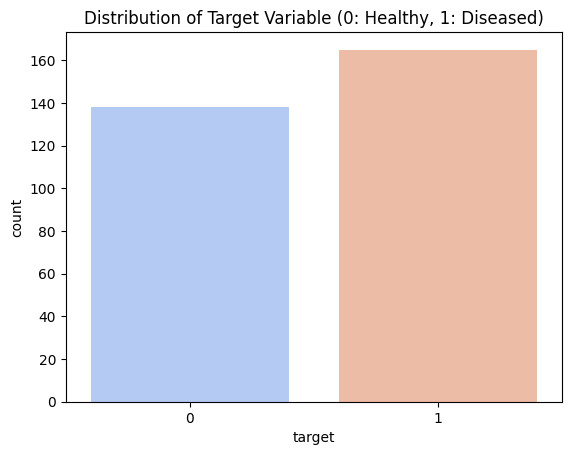

In [5]:
# Visualizing the Target Variable
sns.countplot(x='target', data=heart_data, palette='coolwarm')
plt.title("Distribution of Target Variable (0: Healthy, 1: Diseased)")
plt.show()

In [6]:
# Feature Selection
X = heart_data.drop(columns=['target'])  # Independent variables
Y = heart_data['target']  # Target variable

In [7]:
#  Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
#  Splitting the Data
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, stratify=Y, random_state=42)
print("\nDataset split: Train shape:", X_train.shape, "Test shape:", X_test.shape)



Dataset split: Train shape: (242, 13) Test shape: (61, 13)


In [9]:
# Model Training (Logistic Regression)
model = LogisticRegression(max_iter=200)
model.fit(X_train, Y_train)


LogisticRegression(max_iter=200)

In [10]:
# Model Evaluation
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)


In [11]:
print("\n🔹 Accuracy on Training Data:", accuracy_score(Y_train, Y_train_pred))
print("🔹 Accuracy on Test Data:", accuracy_score(Y_test, Y_test_pred))
print("\n🔹 Classification Report:")
print(classification_report(Y_test, Y_test_pred))


🔹 Accuracy on Training Data: 0.8429752066115702
🔹 Accuracy on Test Data: 0.8032786885245902

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



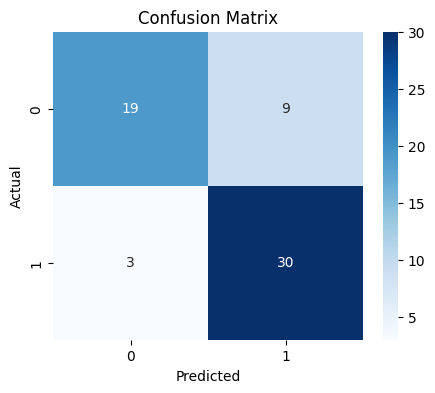

In [12]:
# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(Y_test, Y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [19]:
# Building a Predictive System
def predict_heart_disease(input_data):
    input_data_array = np.asarray(input_data).reshape(1, -1)
    input_data_scaled = scaler.transform(input_data_array)  # Apply scaling
    prediction = model.predict(input_data_scaled)
    return "The Person has Heart Disease" if prediction[0] == 1 else "The Person does not have Heart Disease"

In [14]:
sample_input = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)
print("\n Prediction Result:", predict_heart_disease(sample_input))


 Prediction Result: The Person does not have Heart Disease


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
